In [25]:
mols = [
    {
        'molecule': 'Naphthalene (1)',
        'signature_rank': 1
    },
    {
        'molecule': 'Biphenyl (4)',
        'signature_rank': 43
    },
    {
        'molecule': 'Phenanthrene (12)',
        'signature_rank': 42
    },
    {
        'molecule': 'Pyrene (20)',
        'signature_rank': 12
    },
    {
        'molecule': 'Fluoranthene (19)',
        'signature_rank': 13
    }
]

fragments_path = '/usr/scratch/chromalyzer/lr_l2_results/fragments/'

In [26]:
import pandas as pd

data = []

for mol in mols:
    rank = mol['signature_rank']
    fragment = pd.read_csv(fragments_path + f'rank_{rank}.csv')
    
    # Split the 'samples' column and count occurrences
    sample_counts = fragment['samples'].str.split(',').explode().value_counts()

    for sample, count in sample_counts.items():
        data.append((mol['molecule'],sample,count))

In [27]:
data

[('Naphthalene (1)', ' LEW 85311', 23),
 ('Naphthalene (1)', 'Murchison', 16),
 ('Naphthalene (1)', ' Murchison', 13),
 ('Naphthalene (1)', ' Jbilet Winselwan', 13),
 ('Naphthalene (1)', 'Orgueil', 10),
 ('Naphthalene (1)', ' LON 94101', 6),
 ('Naphthalene (1)', 'LON 94101', 5),
 ('Naphthalene (1)', ' ALH 83100', 3),
 ('Naphthalene (1)', ' Aguas Zarcas', 2),
 ('Naphthalene (1)', 'Jbilet Winselwan', 2),
 ('Naphthalene (1)', 'ALH 83100', 1),
 ('Naphthalene (1)', 'LEW 85311', 1),
 ('Biphenyl (4)', 'Orgueil', 2),
 ('Biphenyl (4)', ' LEW 85311', 1),
 ('Biphenyl (4)', 'LEW 85311', 1),
 ('Phenanthrene (12)', 'Orgueil', 15),
 ('Phenanthrene (12)', ' LEW 85311', 15),
 ('Phenanthrene (12)', 'LEW 85311', 3),
 ('Phenanthrene (12)', 'Utah Soil', 2),
 ('Phenanthrene (12)', ' Orgueil', 1),
 ('Phenanthrene (12)', ' ALH 83100', 1),
 ('Pyrene (20)', 'LEW 85311', 12),
 ('Pyrene (20)', 'Aguas Zarcas', 9),
 ('Pyrene (20)', ' LEW 85311', 3),
 ('Pyrene (20)', 'ALH 83100', 2),
 ('Pyrene (20)', ' LON 94101', 1

In [28]:
frag = pd.DataFrame(data,columns=['Molecule','Sample','Count'])

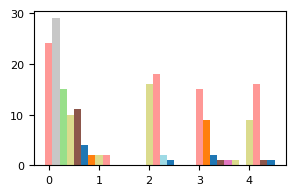

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

# Your data

# Organize data
molecules = defaultdict(lambda: defaultdict(int))
for molecule, sample, count in data:
    molecules[molecule][sample.strip()] += count

# Create a color map for samples
all_samples = sorted(set(sample.strip() for _, sample, _ in data))
colors = plt.cm.tab20(np.linspace(0, 1, len(all_samples)))
sample_colors = dict(zip(all_samples, colors))

# Plotting
fig, ax = plt.subplots(figsize=(3, 2))

x = np.arange(len(molecules))
max_samples = max(len(molecule_data) for molecule_data in molecules.values())
width = 1 / max_samples

for molecule_index, (molecule, sample_data) in enumerate(molecules.items()):
    sample_indices = []
    heights = []
    colors = []
    for sample_index, (sample, count) in enumerate(sample_data.items()):
        if count > 0:
            sample_indices.append(sample_index)
            heights.append(count)
            colors.append(sample_colors[sample])
    
    positions = x[molecule_index] + np.array(sample_indices) * width
    ax.bar(positions, heights, width, color=colors)

# ax.set_xlabel('Molecules')
# ax.set_ylabel('Number of Occurrences')
# ax.set_title('Molecule Occurrences by Sample')
# ax.set_xticks(x + width * (max_samples - 1) / 2)
# ax.set_xticklabels(molecules.keys(), rotation=45, ha='right')

# Create legend
legend_elements = [plt.Rectangle((0, 0), 1, 1, color=color, label=sample) for sample, color in sample_colors.items()]
# ax.legend(handles=legend_elements, title='Samples', bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=8)

plt.tight_layout()
plt.savefig('dist_mole.pdf', format='pdf', bbox_inches='tight', dpi=400)
plt.show()

In [8]:
data

,Chemical Name,Biotic Score,Abiotic Score,Combined Score,Rings
0,Napthalene,-91.869285,-8.685040,-83.184245,2
1,Biphenyl,-18.037033,-12.223008,-5.814024,2
2,Phenanthrene,-12.922245,-9.593562,-3.328683,3
3,Anthracene,-12.431471,-10.165216,-2.266255,3
4,Acenaphthenes,-15.936400,-10.757709,-5.178691,3
5,Napthalene 1-phenyl-,-12.510296,-12.222098,-0.288198,3
6,Pyrene,-12.349144,-9.361463,-2.987681,4
7,Fluoranthene,-11.659604,-10.245690,-1.413914,4


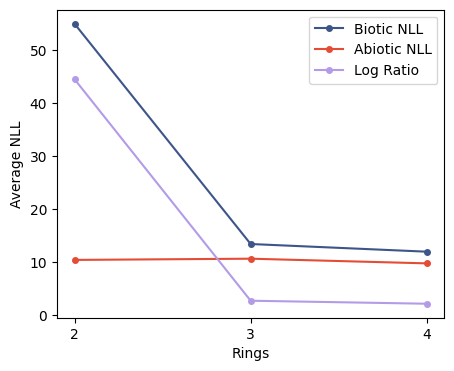

In [8]:
import pandas as pd

data = pd.read_csv('data/(rt1, rt2)_logp.csv')
# Calculate the average of the absolute Biotic Score, Abiotic Score, and Combined Score per ring number
average_scores_per_ring = data.groupby('Rings').agg({
    'Biotic Score': lambda x: x.abs().mean(),
    'Abiotic Score': lambda x: x.abs().mean(),
    'Combined Score': lambda x: x.abs().mean()
}).reset_index()

import matplotlib.pyplot as plt

# Plot the average absolute scores per ring
plt.figure(figsize=(5, 4))

plt.plot(average_scores_per_ring['Rings'], average_scores_per_ring['Biotic Score'], label='Biotic NLL', marker='o',color='#3d5589', markersize=4)
plt.plot(average_scores_per_ring['Rings'], average_scores_per_ring['Abiotic Score'], label='Abiotic NLL', marker='o',color='#e54c35', markersize=4)
plt.plot(average_scores_per_ring['Rings'], average_scores_per_ring['Combined Score'], label='Log Ratio', marker='o', color='#B39BE8', markersize=4)

plt.rcParams.update({'font.size': 8})  # Updating the font size globally for the plot

plt.xticks([2, 3, 4], fontsize=10)  # Set tick font size
plt.yticks(fontsize=10)
plt.xlabel('Rings', fontsize=10)
plt.ylabel('Average NLL', fontsize=10)

plt.legend(fontsize=10)
plt.grid(False)
plt.savefig('NLL_plot.pdf')

In [20]:
def bin_and_sum(df, min_mz, max_mz, bin_size=10):
    bins = np.arange(min_mz, max_mz + bin_size, bin_size)
    binned_data = df.groupby(pd.cut(df['m/z'], bins=bins))['sample_count'].sum().reset_index()
    binned_data['m/z_range'] = binned_data['m/z'].apply(lambda x: f"{int(x.left)}-{int(x.right)}")
    return binned_data

/tmp/ipykernel_21097/1926082760.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = df.groupby(pd.cut(df['m/z'], bins=bins))['sample_count'].sum().reset_index()


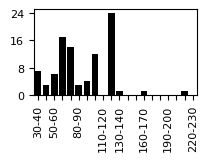

/tmp/ipykernel_21097/1926082760.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = df.groupby(pd.cut(df['m/z'], bins=bins))['sample_count'].sum().reset_index()


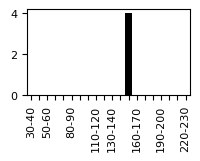

/tmp/ipykernel_21097/1926082760.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = df.groupby(pd.cut(df['m/z'], bins=bins))['sample_count'].sum().reset_index()


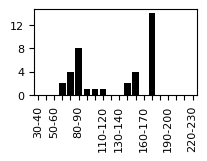

/tmp/ipykernel_21097/1926082760.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = df.groupby(pd.cut(df['m/z'], bins=bins))['sample_count'].sum().reset_index()


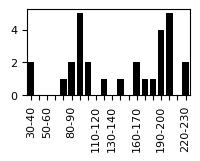

/tmp/ipykernel_21097/1926082760.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  binned_data = df.groupby(pd.cut(df['m/z'], bins=bins))['sample_count'].sum().reset_index()


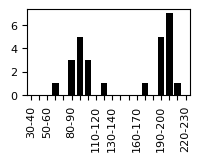

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator



mols = [
    {
        'molecule': 'Naphthalene',
        'signature_rank': 1,
    },
    {
        'molecule': 'Biphenyl',
        'signature_rank': 43
    },
    {
        'molecule': 'Phenanthrene)',
        'signature_rank': 42
    },
    {
        'molecule': 'Pyrene',
        'signature_rank': 12
    },
    {
        'molecule': 'Fluoranthene',
        'signature_rank': 13
    }
]

for mol in mols:
    molecule = mol['molecule']
    rank = mol['signature_rank']

    # Read the CSV file
    df = pd.read_csv(f'/usr/scratch/chromalyzer/lr_l2_results/fragments/rank_{rank}.csv')

    # Extract m/z values and count samples
    m_z_values = df['m/z']
    sample_counts = df['samples'].apply(lambda x: len(x.split(',')))

    df['sample_count'] = sample_counts

    # Assuming your dataframe is named 'df'
    bin_size = 10
    binned_data = bin_and_sum(df, 30, 230, bin_size)

    fig, ax = plt.subplots(figsize=(1.85, 1.1))
    bars = ax.bar(range(len(binned_data)), binned_data['sample_count'], width=0.8, color='black')

    ax.grid(True, axis='y', alpha=0.3)

    # Select a few bins to show labels for
    num_labels = 8
    label_indices = np.linspace(0, len(binned_data) - 1, num_labels, dtype=int)

    # Create labels and positions for selected bins
    selected_labels = [binned_data['m/z_range'].iloc[i] if i in label_indices else '' for i in range(len(binned_data))]
    x_positions = range(len(binned_data))

    ax.set_xticks(x_positions)
    ax.set_xticklabels(selected_labels, rotation=90, ha='center', fontsize=8)

    # Remove x-labels for non-selected bins
    for label, idx in zip(ax.get_xticklabels(), range(len(binned_data))):
        if idx not in label_indices:
            label.set_visible(False)

    ax.tick_params(axis='y', labelsize=8)

    # Remove white space from left and right
    ax.set_xlim(-0.5, len(binned_data) - 0.5)

     # Set y-axis to use only integers
    ax.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=4))

    # Adjust layout and remove extra white space
    plt.tight_layout()
    fig.subplots_adjust(left=0.1, right=0.98, bottom=0.2, top=0.98)

    ax.grid(False)

    plt.savefig(f'{molecule}.pdf', bbox_inches='tight', pad_inches=0)
    plt.show()